In [1]:
# import the libraries you need

import os
import math
import numpy as np
import rasterio
from tqdm import tqdm
import requests
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg
from matplotlib.image import imread
from itertools import product
from PIL import Image
from itertools import chain
import json
from jsonpath import jsonpath 

from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import type_of_target

import tensorflow as tf
import torch
# Folium setup.
import folium

var DE_Forest =Picea_abies.merge(Fagus_sylvatica).merge(Pinus_sylvestris).merge(Quercus_robur).merge(Betula_pendula)
.merge(Quercus_petraea).merge(Fraxinus_excelsior).merge(Acer_pseudoplatanus).merge(Sorbus_aucuparia).merge(Carpinus_betulus)
.merge(Larix_decidua).merge(Abies_alba).merge(Pseudotsuga_menziesii).merge(Frangula_alnus).merge(Alnus_glutinosa)
.merge(Prunus_avium).merge(Populus_tremula).merge(Larix_kaempferi).merge(Quercus_rubra).merge(Acer_campestre)

B11
B11_1
B11_2
B11_3
B12
B12_1
B12_2
B12_3
B2
B2_1
B2_2
B2_3
B3
B3_1
B3_2
B3_3
B4
B4_1
B4_2
B4_3
B5
B5_1
B5_2
B5_3
B6
B6_1
B6_2
B6_3
B7
B7_1
B7_2
B7_3
B8
B8A
B8A_1
B8A_2
B8A_3
B8_1
B8_2
B8_3
GI
GI_1
GI_2
GI_3
NDRESWIR
NDRESWIR_1
NDRESWIR_2
NDRESWIR_3
NDVI
NDVI_1
NDVI_2
NDVI_3
NDWI
NDWI_1
NDWI_2
NDWI_3
SRNIRRE1
SRNIRRE1_1
SRNIRRE1_2
SRNIRRE1_3
B11
B11_1
B11_2
B11_3
B12
B12_1
B12_2
B12_3
B2
B2_1
B2_2
B2_3
B3
B3_1
B3_2
B3_3
B4
B4_1
B4_2
B4_3
B5
B5_1
B5_2
B5_3
B6
B6_1
B6_2
B6_3
B7
B7_1
B7_2
B7_3
B8
B8A
B8A_1
B8A_2
B8A_3
B8_1
B8_2
B8_3
GI
GI_1
GI_2
GI_3
NDRESWIR
NDRESWIR_1
NDRESWIR_2
NDRESWIR_3
NDVI
NDVI_1
NDVI_2
NDVI_3
NDWI
NDWI_1
NDWI_2
NDWI_3
SRNIRRE1
SRNIRRE1_1
SRNIRRE1_2
SRNIRRE1_3
B11
B11_1
B11_2
B11_3
B12
B12_1
B12_2
B12_3
B2
B2_1
B2_2
B2_3
B3
B3_1
B3_2
B3_3
B4
B4_1
B4_2
B4_3
B5
B5_1
B5_2
B5_3
B6
B6_1
B6_2
B6_3
B7
B7_1
B7_2
B7_3
B8
B8A
B8A_1
B8A_2
B8A_3
B8_1
B8_2
B8_3
GI
GI_1
GI_2
GI_3
NDRESWIR
NDRESWIR_1
NDRESWIR_2
NDRESWIR_3
NDVI
NDVI_1
NDVI_2
NDVI_3
NDWI
NDWI_1
NDWI_2
NDWI_3
SRNI

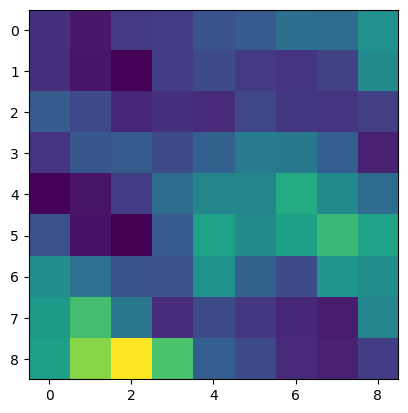

In [2]:

path = '/Users/siruiwang/Documents/ESPACE-LECTURE/3rd_semester/Data science of earth observation/Project_data_science/data0129/GeoJson/Carpinus_betulus_needle_broad_0129_indices.geojson'
index=10
tree_type = 'Carpinus_betulus'
kernel=9
bands=60
bands_oneseason=15
with open(path) as f:
    data = json.load(f)
for feature in data['features']:
    for properties in feature['properties']:
        print(properties)

B8 = jsonpath(data, "$..B8") 

B8data=np.array(B8[0])
print(B8data.shape)
plt.imshow(B8data) 
#print(ddate) 


In [3]:
B2 = jsonpath(data, "$..B2") 
B3 = jsonpath(data, "$..B3") 
B4 = jsonpath(data, "$..B4") 
B5 = jsonpath(data, "$..B5") 
B6 = jsonpath(data, "$..B6") 
B7 = jsonpath(data, "$..B7") 
B8 = jsonpath(data, "$..B8") 
B8A = jsonpath(data, "$..B8A") 
B11 = jsonpath(data, "$..B11") 
B12 = jsonpath(data, "$..B12") 
NDVI = jsonpath(data, "$..NDVI")
NDWI = jsonpath(data, "$..NDWI")
SRNIRRE1 = jsonpath(data, "$..SRNIRRE1")
NDRESWIR = jsonpath(data, "$..NDRESWIR")
GI = jsonpath(data, "$..GI")

B2_1 = jsonpath(data, "$..B2_1") 
B3_1 = jsonpath(data, "$..B3_1") 
B4_1 = jsonpath(data, "$..B4_1") 
B5_1 = jsonpath(data, "$..B5_1") 
B6_1 = jsonpath(data, "$..B6_1") 
B7_1 = jsonpath(data, "$..B7_1") 
B8_1 = jsonpath(data, "$..B8_1") 
B8A_1 = jsonpath(data, "$..B8A_1") 
B11_1 = jsonpath(data, "$..B11_1") 
B12_1 = jsonpath(data, "$..B12_1") 
NDVI_1 = jsonpath(data, "$..NDVI_1")
NDWI_1 = jsonpath(data, "$..NDWI_1")
SRNIRRE1_1 = jsonpath(data, "$..SRNIRRE1_1")
NDRESWIR_1 = jsonpath(data, "$..NDRESWIR_1")
GI_1 = jsonpath(data, "$..GI_1")

B2_2 = jsonpath(data, "$..B2_2") 
B3_2 = jsonpath(data, "$..B3_2") 
B4_2 = jsonpath(data, "$..B4_2") 
B5_2 = jsonpath(data, "$..B5_2") 
B6_2 = jsonpath(data, "$..B6_2") 
B7_2 = jsonpath(data, "$..B7_2") 
B8_2 = jsonpath(data, "$..B8_2") 
B8A_2 = jsonpath(data, "$..B8A_2") 
B11_2 = jsonpath(data, "$..B11_2") 
B12_2 = jsonpath(data, "$..B12_2") 
NDVI_2 = jsonpath(data, "$..NDVI_2")
NDWI_2 = jsonpath(data, "$..NDWI_2")
SRNIRRE1_2 = jsonpath(data, "$..SRNIRRE1_2")
NDRESWIR_2 = jsonpath(data, "$..NDRESWIR_2")
GI_2 = jsonpath(data, "$..GI_2")

B2_3 = jsonpath(data, "$..B2_3") 
B3_3 = jsonpath(data, "$..B3_3") 
B4_3 = jsonpath(data, "$..B4_3") 
B5_3 = jsonpath(data, "$..B5_3") 
B6_3 = jsonpath(data, "$..B6_3") 
B7_3 = jsonpath(data, "$..B7_3") 
B8_3 = jsonpath(data, "$..B8_3") 
B8A_3 = jsonpath(data, "$..B8A_3") 
B11_3 = jsonpath(data, "$..B11_3") 
B12_3 = jsonpath(data, "$..B12_3") 
NDVI_3 = jsonpath(data, "$..NDVI_3")
NDWI_3 = jsonpath(data, "$..NDWI_3")
SRNIRRE1_3 = jsonpath(data, "$..SRNIRRE1_3")
NDRESWIR_3 = jsonpath(data, "$..NDRESWIR_3")
GI_3 = jsonpath(data, "$..GI_3")

In [4]:
number_samples = np.size(B8,0)
dataset_spring= np.zeros((number_samples,   kernel,kernel,bands_oneseason), dtype=float)
dataset_summer= np.zeros((number_samples,   kernel,kernel,bands_oneseason), dtype=float)
dataset_autumn= np.zeros((number_samples,   kernel,kernel,bands_oneseason), dtype=float)
dataset_winter= np.zeros((number_samples,   kernel,kernel,bands_oneseason), dtype=float)
dataset= np.zeros((number_samples,   kernel,kernel,bands), dtype=float)
for i in range(0,number_samples-1):
      dataset_spring[i]=np.dstack((np.array(B2[i]),np.array(B3[i]),np.array(B4[i]),np.array(B5[i]),np.array(B6[i]),np.array(B7[i]),np.array(B8[i]),np.array(B8A[i]),np.array(B11[i]),np.array(B12[i]),np.array(NDVI[i]),np.array(NDWI[i]),np.array(SRNIRRE1[i]),np.array(NDRESWIR[i]),np.array(GI[i])))
      dataset_summer[i]=np.dstack((np.array(B2_1[i]),np.array(B3_1[i]),np.array(B4_1[i]),np.array(B5_1[i]),np.array(B6_1[i]),np.array(B7_1[i]),np.array(B8_1[i]),np.array(B8A_1[i]),np.array(B11_1[i]),np.array(B12_1[i]),np.array(NDVI_1[i]),np.array(NDWI_1[i]),np.array(SRNIRRE1_1[i]),np.array(NDRESWIR_1[i]),np.array(GI_1[i])))
      dataset_autumn[i]=np.dstack((np.array(B2_2[i]),np.array(B3_2[i]),np.array(B4_2[i]),np.array(B5_2[i]),np.array(B6_2[i]),np.array(B7_2[i]),np.array(B8_2[i]),np.array(B8A_2[i]),np.array(B11_2[i]),np.array(B12_2[i]),np.array(NDVI_2[i]),np.array(NDWI_2[i]),np.array(SRNIRRE1_2[i]),np.array(NDRESWIR_2[i]),np.array(GI_2[i])))
      dataset_winter[i]=np.dstack((np.array(B2_3[i]),np.array(B3_3[i]),np.array(B4_3[i]),np.array(B5_3[i]),np.array(B6_3[i]),np.array(B7_3[i]),np.array(B8_3[i]),np.array(B8A_3[i]),np.array(B11_3[i]),np.array(B12_3[i]),np.array(NDVI_3[i]),np.array(NDWI_3[i]),np.array(SRNIRRE1_3[i]),np.array(NDRESWIR_3[i]),np.array(GI_3[i])))
      dataset[i]=np.dstack((np.array(dataset_spring[i]),np.array(dataset_summer[i]),np.array(dataset_autumn[i]),np.array(dataset_winter[i])))
print(np.array(dataset).shape)
    

(9, 9, 9, 60)


In [5]:
def navie_sample(src_image, label):
    # forest-1, debris-2, water-3
    classes = label
    # get the feature space from drone image
    #with rasterio.open(src_image) as src_ds:
    #    src = src_ds.read()
       
    yield (src_image, label)

In [6]:
########### define the result train/valid file #############
### Here the tiles are then saved into numpy arraies
root = r"/Users/siruiwang/Documents/ESPACE-LECTURE/3rd_semester/Data science of earth observation/Project_data_science/data0129/npy/"

# training samples
t_root = root + tree_type + "_samples.npy"
t_sample = []
num_sam = dataset.shape[0]
for i in range(0,num_sam-1):
    result = list(navie_sample(dataset[i], index))
    t_sample.append(result)
t_sample_array = np.array(t_sample, dtype=object)
print(t_sample_array.shape)
np.save(t_root, t_sample_array)

(8, 1, 2)
